In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
pl = pd.read_csv("player_list.csv")
pl.head()

,Unnamed: 0,구분,이름,출생,포지션,국내입단연도,첫구단활동종료,첫구단활동기간,첫소속구단,해외진출연도,해외 첫 소속팀,국내복귀,복귀 소속팀,연봉(백만원),cnt_golden,cnt_mvp,cnt_all_star,기사량
0,4,메이저리그,김광현,1988,좌완선발,2007.0,2019.0,13.0,SK와이번스,2020,세인트루이스 카디널스,2022,SSG 랜더스,8100.0,1.0,1.0,5.0,249
1,8,메이저리그,김현수,1988,좌익수/1루수,2006.0,2015.0,10.0,두산베어스,2016,볼티모어 오리올스,2018,LG 트윈스,1400.0,3.0,NaN,7.0,284
2,9,메이저리그,류현진,1987,좌완선발,2006.0,2012.0,7.0,한화이글스,2013,LA다저스,2024,한화이글스,2500.0,2.0,2.0,4.0,1637
3,10,메이저리그,박병호,1986,1루수,2005.0,2011.0,7.0,LG트윈스,2016,미네소타 트윈스,2018,넥센히어로즈,1500.0,6.0,2.0,5.0,243
4,12,메이저리그,양현종,1988,좌완투수,2007.0,2020.0,14.0,KIA타이거즈,2021,텍사스 레이져스,2022,KIA 타이거즈,1000.0,1.0,1.0,5.0,319


In [5]:
#글씨 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [33]:
# 대상 칼럼 객체 생성
gold = pl.cnt_golden
mvp = pl.cnt_mvp
star = pl.cnt_all_star
name = pl.이름
article = pl.기사량

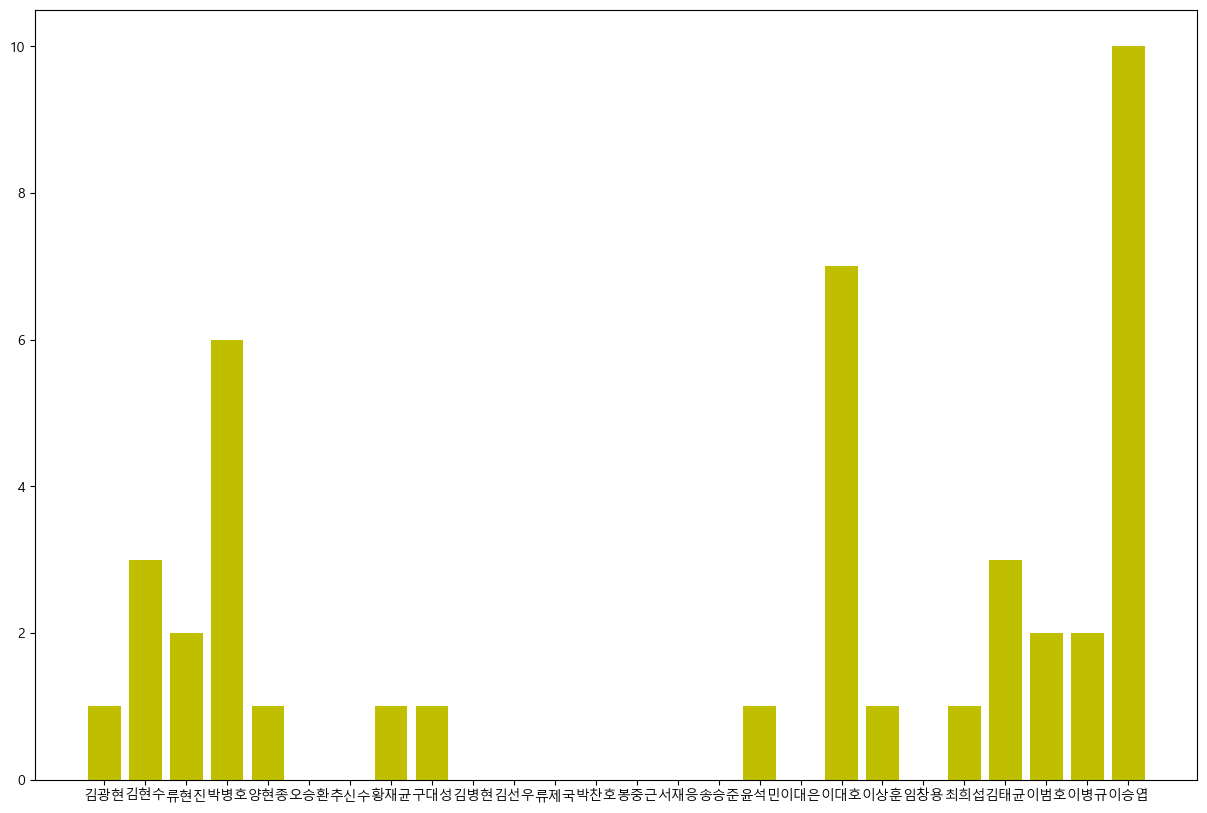

In [24]:
#각 선수별 골든글러브 수상 횟수
plt.figure(figsize=(15, 10))
plt.bar(name, gold, color = 'y')
plt.show()

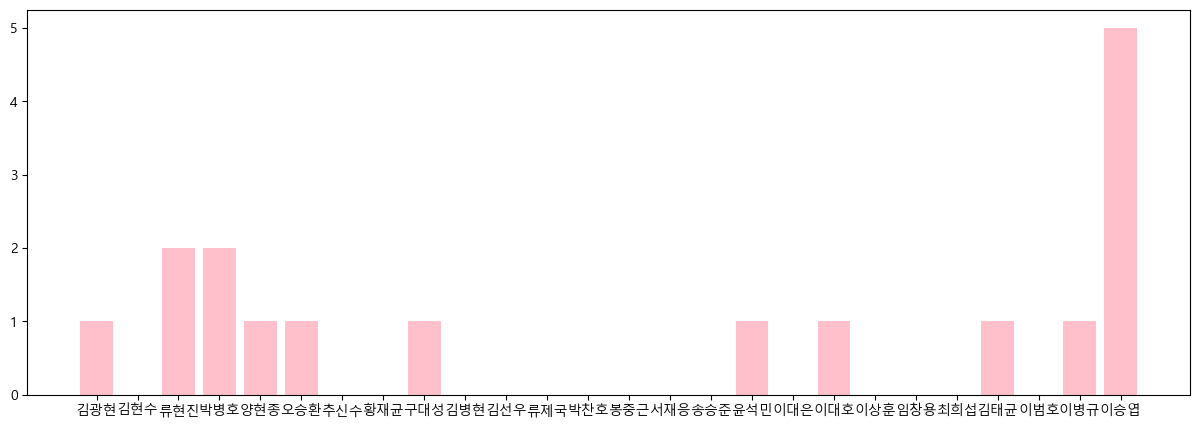

In [25]:
#각 선수별 mvp(정규mvp+신인상) 수상 횟수
plt.figure(figsize=(15, 5))
plt.bar(name, mvp, color = 'pink')
plt.show()

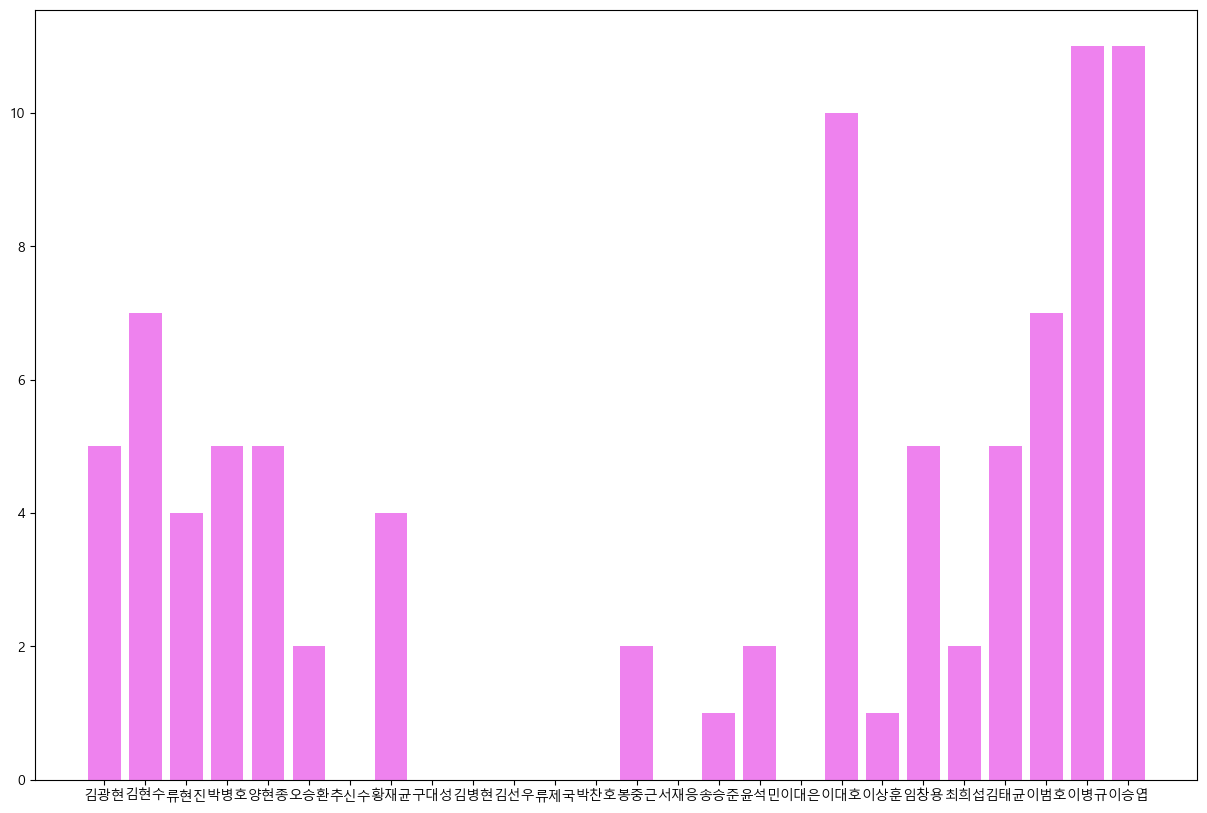

In [26]:
#각 선수별 골든글러브 수상 횟수
plt.figure(figsize=(15, 10))
plt.bar(name, star, color = 'violet')
plt.show()

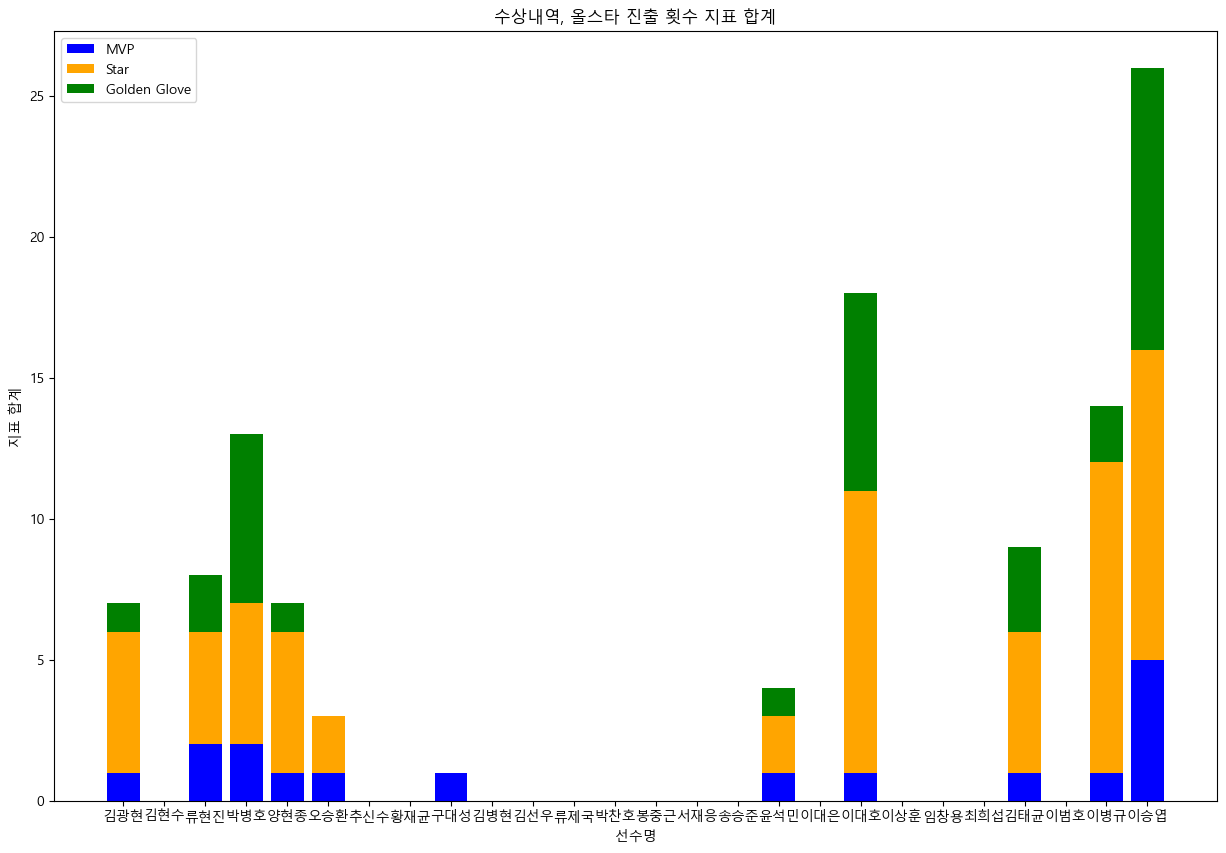

In [36]:
# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.bar(name, mvp, label="MVP", color='blue')
plt.bar(name, star, bottom=mvp, label="Star", color='orange')
plt.bar(name, gold, bottom=mvp + star, label="Golden Glove", color='green')

# 그래프 세부 설정
plt.xlabel("선수명")
plt.ylabel("지표 합계")
plt.title("수상내역, 올스타 진출 횟수 지표 합계")
plt.legend()

# 그래프 표시
plt.show()

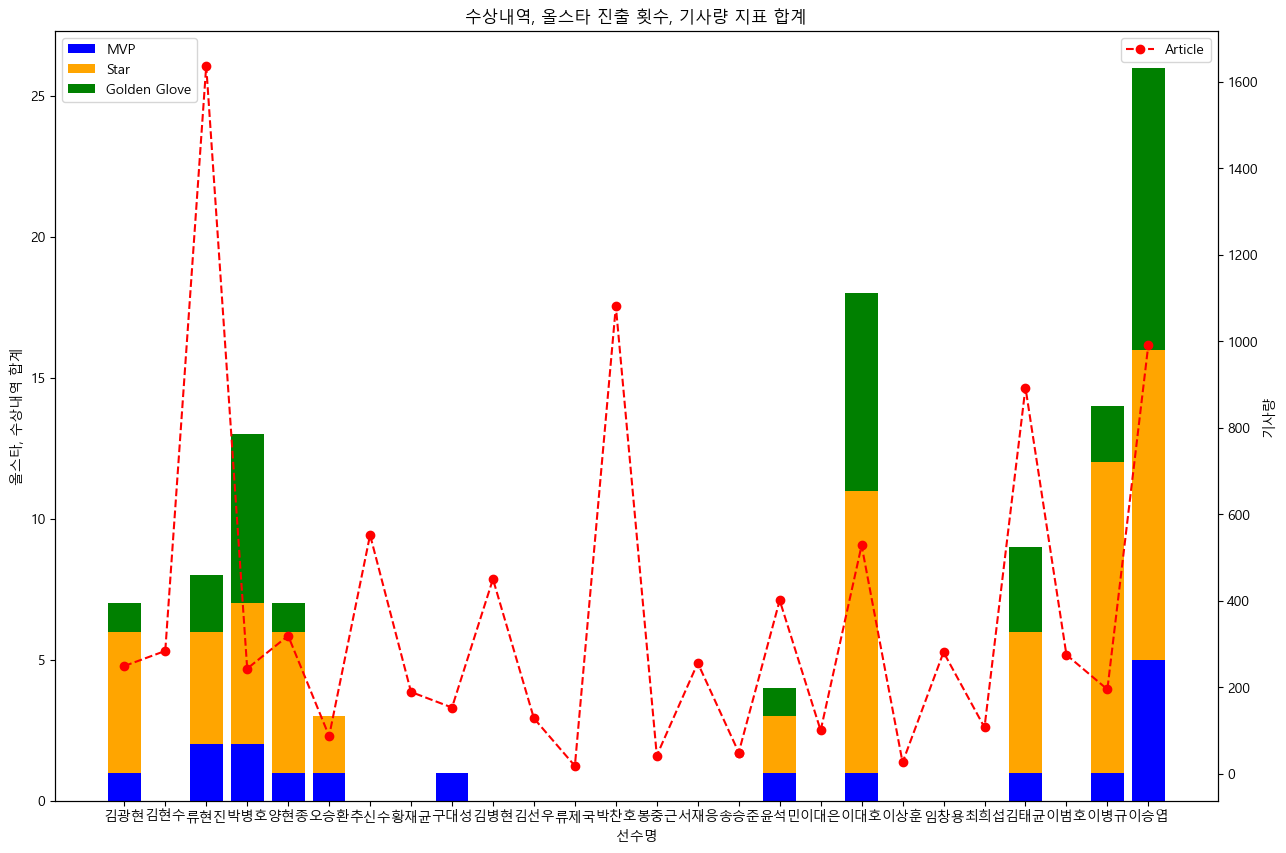

In [38]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 10))

# 첫 번째 y축에 누적 막대 그래프 그리기
ax1.bar(name, mvp, label="MVP", color='blue')
ax1.bar(name, star, bottom=mvp, label="Star", color='orange')
ax1.bar(name, gold, bottom=mvp + star, label="Golden Glove", color='green')

# 첫 번째 y축 레이블 및 설정
ax1.set_xlabel("선수명")
ax1.set_ylabel("올스타, 수상내역 합계")
ax1.set_title("수상내역, 올스타 진출 횟수, 기사량 지표 합계")
ax1.legend(loc="upper left")

# 두 번째 y축 생성 및 article 데이터 점 그래프로 추가
ax2 = ax1.twinx()
ax2.plot(name, article, label="Article", color='red', marker='o', linestyle='--')

# 두 번째 y축 레이블 및 설정
ax2.set_ylabel("기사량")
ax2.legend(loc="upper right")

# 그래프 표시
plt.show()

In [39]:
#년도별 관중 수 데이터
ch = pd.read_csv("kbo_crowd_history.csv")
ch.head()

,연도,삼성,KIA,롯데,LG,두산,한화,SSG,키움,NC,...,LG_avg,두산_avg,한화_avg,SSG_avg,키움_avg,NC_avg,KT_avg,현대_avg,쌍방울_avg,계_avg
0,2023,"845,775","717,025","891,745","1,202,637","969,562","566,785","1,068,211","583,629","557,607",...,"16,939","13,282","7,764","14,633","8,220","7,854","9,553",NaN,NaN,"11,250"
1,2022,"674,452","604,394","631,656","930,163","644,614","358,190","981,546","349,773","369,018",...,"12,919","8,953","4,975","13,633","4,858","5,125","7,393",NaN,NaN,"8,439"
2,2021,"278,222","104,989","138,294","116,691","98,036","103,960","118,412","67,407","128,289",...,"1,621","1,362","1,444","1,645",936,"1,782","1,030",NaN,NaN,"1,706"
3,2020,"27,819","21,198","36,717","41,317","55,047","19,962","30,608","27,158","45,992",...,574,765,277,425,377,639,312,NaN,NaN,456
4,2019,"691,681","692,163","679,208","1,000,400","983,474","555,225","982,962","453,886","710,274",...,"13,894","13,659","7,711","13,652","6,304","9,865","7,455",NaN,NaN,"10,119"


In [59]:
# NaN 값은 그대로 두고, 쉼표를 제거 후 int형으로 변환
ch['한화'] = ch['한화'].str.replace(',', '', regex=False)  # 쉼표 제거
ch['한화'] = pd.to_numeric(ch['한화'], errors='coerce')  # 숫자로 변환, 오류는 NaN으로 처리

ch['한화_avg'] = ch['한화_avg'].str.replace(',', '', regex=False)  # 쉼표 제거
ch['한화_avg'] = pd.to_numeric(ch['한화_avg'], errors='coerce')  # 숫자로 변환, 오류는 NaN으로 처리


In [60]:
# 연도, 한화, 한화_avg 열 정의
years = ch['연도'].astype(int)
hanwha = ch['한화']
hanwha_avg = ch['한화_avg']

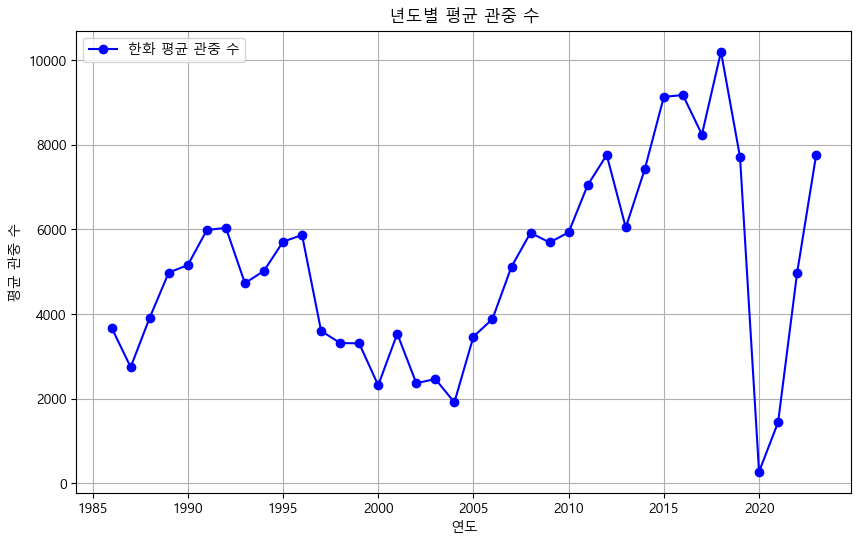

In [62]:
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, hanwha_avg, marker='o', linestyle='-', color='blue', label='한화 평균 관중 수')

# 그래프 세부 설정
plt.xlabel("연도")
plt.ylabel("평균 관중 수")
plt.title("년도별 평균 관중 수")
plt.grid(True)
plt.legend()

# 그래프 표시
plt.show()

In [63]:
tr = pd.read_csv("team_rank.csv")
tr.head()

,Year,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문
0,1982,1,OB,80,56,24,0,0.700,0.0,5승0무5패,2패,28-0-12,28-0-12
1,1982,2,삼성,80,54,26,0,0.675,2.0,6승0무4패,1패,30-0-10,24-0-16
2,1982,3,MBC,80,46,34,0,0.575,10.0,8승0무2패,2승,24-0-16,22-0-18
3,1982,4,해태,80,38,42,0,0.475,18.0,7승0무3패,4승,21-0-19,17-0-23
4,1982,5,롯데,80,31,49,0,0.388,25.0,3승0무7패,2패,19-0-21,12-0-28


In [64]:
hwr = tr[tr['팀명'] == '한화']

# 결과 확인
print(hwr)

     Year  순위  팀명   경기   승   패   무     승률   게임차  최근10경기  연속        홈       방문
86   1994   3  한화  126  65  59   2  0.524  15.0  6승0무4패  3승  34-0-29  31-2-30
96   1995   6  한화  126  55  71   0  0.437  21.5  3승0무7패  3패  32-0-31  23-0-40
102  1996   4  한화  126  70  55   1  0.560   3.5  7승0무3패  1패  33-1-29  37-0-26
113  1997   7  한화  126  51  73   2  0.413  23.5  2승0무8패  5패  28-1-34  23-1-39
121  1998   7  한화  126  55  66   5  0.455  23.5  2승1무7패  7패  29-2-32  26-3-34
134  2001   4  한화  133  61  68   4  0.473   4.5  7승0무3패  2패  27-3-36  34-1-32
145  2002   7  한화  133  59  69   5  0.461  22.5  3승0무7패  1승  31-1-35  28-4-34
151  2003   5  한화  133  63  65   5  0.492  15.5  6승0무4패  3패  36-3-27  27-2-38
161  2004   7  한화  133  53  74   6  0.417  21.5  5승0무5패  1승  27-3-37  26-3-37
166  2005   4  한화  126  64  61   1  0.512  11.5  3승0무7패  2패  35-1-27  29-0-34
172  2006   2  한화  126  67  57   2  0.540   6.5  7승0무3패  2승  33-2-28  34-0-29
181  2007   3  한화  126  67  57   2  0.540   7.5  6승0무4패  1승  34-